In [ ]:
# 1. 설치
!pip install deepface

# 2. 라이브러리 불러오기
from deepface import DeepFace
from PIL import Image
import matplotlib.pyplot as plt
import IPython.display as display
import os

# 3. 감정-향수-코디 매핑 정의
emotion_perfume_map = {
    'happy': [('FRUITY', 2), ('MUGET', 1), ('CITRUS', 1)],
    'sad': [('VANILLA AMBER', 2), ('BOUQUET', 1), ('SOAP', 1)],
    'angry': [('WOODY', 2), ('GREEN', 1), ('MUSK', 1)],
    'surprise': [('OCEAN', 2), ('CITRUS', 1), ('FRUITY', 1)],
    'neutral': [('SOAP', 2), ('GREEN', 1), ('MUGET', 1)],
    'fear': [('MUSK', 2), ('VANILLA AMBER', 1), ('BOUQUET', 1)],
    'disgust': [('CITRUS', 2), ('SOAP', 1), ('OCEAN', 1)]
}

emotion_fashion_map = {
    'happy': ['밝은 셔츠 + 청바지', '파스텔 원피스'],
    'sad': ['그레이 니트 + 슬랙스', '차분한 트렌치코트'],
    'angry': ['블랙 재킷 + 데님 팬츠', '스트릿 룩 후디'],
    'surprise': ['컬러 블록 재킷 + 치노 팬츠', '캐주얼 셋업'],
    'neutral': ['화이트 셔츠 + 베이지 팬츠', '심플 니트 + 슬랙스'],
    'fear': ['톤 다운 스웨터 + 코듀로이 팬츠'],
    'disgust': ['심플 셋업 + 스카프']
}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=b7df4ee1f791899d8b4ffc1080511919d8bb9f770cfc7d946984b5e7e235648f
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
25-06-28 13:59:54 - Directory /root/.deepface has been created
25-06-28 13:59:54 - Directory /root/.deepface/weights has been created


Saving TalkMedia_i_5d2f9dc1a6f2.jpg.jpg to TalkMedia_i_5d2f9dc1a6f2.jpg.jpg


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]



📂 파일: input.jpg
🧓 나이: 30세 | 성별: Man | 감정: neutral
🧠 추정된 MBTI: INTJ
💐 추천 향수: SOAP (2방울), GREEN (1방울), MUGET (1방울)
👗 추천 패션: 화이트 셔츠 + 베이지 팬츠, 심플 니트 + 슬랙스


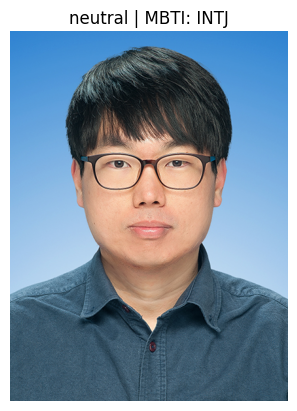

In [3]:
# 1. 설치
!pip install deepface

# 2. 라이브러리
from deepface import DeepFace
from PIL import Image
import matplotlib.pyplot as plt
import shutil
from google.colab import files

# 3. 매핑 정의
emotion_perfume_map = {
    'happy': ['FRUITY (2방울)', 'MUGET (1방울)', 'CITRUS (1방울)'],
    'sad': ['VANILLA AMBER (2방울)', 'BOUQUET (1방울)', 'SOAP (1방울)'],
    'angry': ['WOODY (2방울)', 'GREEN (1방울)', 'MUSK (1방울)'],
    'surprise': ['OCEAN (2방울)', 'CITRUS (1방울)', 'FRUITY (1방울)'],
    'neutral': ['SOAP (2방울)', 'GREEN (1방울)', 'MUGET (1방울)'],
    'fear': ['MUSK (2방울)', 'VANILLA AMBER (1방울)', 'BOUQUET (1방울)'],
    'disgust': ['CITRUS (2방울)', 'SOAP (1방울)', 'OCEAN (1방울)']
}

emotion_fashion_map = {
    'happy': ['밝은 셔츠 + 청바지', '파스텔 원피스'],
    'sad': ['그레이 니트 + 슬랙스', '차분한 트렌치코트'],
    'angry': ['블랙 재킷 + 데님 팬츠', '스트릿 룩 후디'],
    'surprise': ['컬러 블록 재킷 + 치노 팬츠', '캐주얼 셋업'],
    'neutral': ['화이트 셔츠 + 베이지 팬츠', '심플 니트 + 슬랙스'],
    'fear': ['톤 다운 스웨터 + 코듀로이 팬츠'],
    'disgust': ['심플 셋업 + 스카프']
}

# 4. MBTI 추정 함수
def infer_mbti(age, gender, emotion):
    ei = 'E' if emotion in ['happy', 'surprise'] else 'I'
    sn = 'N' if emotion in ['neutral', 'fear'] else 'S'
    tf = 'T' if gender == 'Man' else 'F'
    jp = 'J' if age >= 30 else 'P'
    return ei + sn + tf + jp

# 5. 분석 및 결과 출력 함수
def analyze_and_recommend(image_path):
    result = DeepFace.analyze(img_path=image_path, actions=['age', 'gender', 'emotion'], enforce_detection=False)
    age = result[0]['age']
    gender = result[0]['dominant_gender']
    emotion = result[0]['dominant_emotion']
    mbti = infer_mbti(age, gender, emotion)

    perfumes = emotion_perfume_map.get(emotion, ['기본 향수'])
    outfits = emotion_fashion_map.get(emotion, ['기본 코디'])

    print(f"\n📂 파일: {image_path}")
    print(f"🧓 나이: {age}세 | 성별: {gender} | 감정: {emotion}")
    print(f"🧠 추정된 MBTI: {mbti}")
    print(f"💐 추천 향수: {', '.join(perfumes)}")
    print(f"👗 추천 패션: {', '.join(outfits)}")

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{emotion} | MBTI: {mbti}")
    plt.show()

# 6. 파일 업로드 및 분석 실행
uploaded = files.upload()
original_filename = list(uploaded.keys())[0]
image_path = "input.jpg"
shutil.copy(original_filename, image_path)
analyze_and_recommend(image_path)
